In [25]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt   # doesn't work on my laptop
from tistools import read_inputfile, get_LMR_interfaces, read_pathensemble, get_weights
from tistools import set_tau_distrib, set_tau_first_hit_M_distrib, cross_dist_distr, pathlength_distr
from tistools import collect_tau, collect_tau1, collect_tau2, collect_taum
from tistools import ACCFLAGS, REJFLAGS

from tistools import get_lmr_masks, get_generation_mask, get_flag_mask, select_with_masks
from tistools import unwrap_by_weight, running_avg_local_probs, get_local_probs, get_globall_probs, get_global_probz

from pprint import pprint    # to print the vars of the pathensemble object

from istar_test import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%autoreload 2  
 # something with pip install -e .

# Reading

In [27]:
# zero_minus_one = True if lambda_-1 interface is set
# zero_minus_one = False if lambda_-1 interface is not set

# data the maze
#---------------
indir = "/Users/an/Documents/0_mfpt/repptis1/"
zero_minus_one = True
inputfile = indir + "/out.rst"
#inputfile = indir + "/retis.rst"

# new data Elias
#---------------
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/brownian-gamma5/30k-cycles/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/newtonian/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/flat_w-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump1-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump2-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump3-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbump3-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdip2-walls/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdip2-walls/langevin-gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/corr/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/fine_intf/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/fine_intf/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/brownian/intf_shift/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosbumpmeta-walls/langevin_gamma5/intf_shift/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdipmeta-walls/brownian/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/HPC/cosdipmeta-walls/langevin_gamma5/REPPTIS"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/2D-experiments/2D-maze/Wouter-2022/repptis3"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarwell2mod_deep"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/PyRETIS3/toytis/simulations/sim_istarmazz"
# indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/i_star/simulations/RETIS_flat_br_noswap"
# indir = "/run/user/1001/gvfs/smb-share:server=files.ugent.be,share=eliawils,user=eliawils/shares/tw06_biommeda_pyretis/04.2024_MSM_elias/simulations/flat_w-walls/newtonian/REPPTIS"
indir = "/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS"

zero_minus_one = False
inputfile = indir + "/repptis.rst"

import os
import glob
os.chdir(indir)
print(os.getcwd())


folders = glob.glob(indir + "/0[0-9][0-9]")
folders = sorted(folders)
print(folders)

/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS
['/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/001', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/002', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/003', '/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/004']


In [28]:
# !!! last lines !!!  allow to speed up this notebook
# pe.set_orders(load=False...)  -> 1st time you run the code, this will store npy files
# pe.set_orders(load=True...)  -> next time you run the code, you can read npy files

# Reading all input
#===================
interfaces, zero_left, timestep = read_inputfile(inputfile)
LMR_interfaces, LMR_strings = get_LMR_interfaces(interfaces, zero_left)
pathensembles = []
for i,fol in enumerate(folders):
    print("#"*80)
    print(fol)
    pe = read_pathensemble(fol+"/pathensemble.txt")
    pe.set_name(fol)
    pe.set_interfaces([LMR_interfaces[i], LMR_strings[i]])
    if i==0:
        pe.set_zero_minus_one(zero_minus_one)   # TODO this is never used
        pe.set_in_zero_minus(True)
    if i==1:
        pe.set_in_zero_plus(True)
    w, _ = get_weights(pe.flags, ACCFLAGS, REJFLAGS, verbose = False)
    pe.set_weights(w)
    print("pathensemble info: ")
    pprint(vars(pe))
    pathensembles.append(pe)
    # read order parameters order.txt/order.npy into path ensemble object
    #pe.set_orders(load=False, acc_only=True, save=False) # if saving doesn't work
    #### CHANGE HERE ####
    # pe.set_orders(load=False, acc_only=True, save=True) # for the 1st time
    pe.set_orders(load=True, acc_only=True) # for the next times, save=True/False is not important

################################################################################
/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000
pathensemble info: 
{'cyclenumbers': array([    0,     1,     2, ..., 29998, 29999, 30000]),
 'dirs': array([   0., 2636., 1814., ..., 1810.,  915.,  958.]),
 'flags': array(['ACC', 'ACC', 'ACC', ..., 'ACC', 'ACC', 'ACC'], dtype='<U3'),
 'generation': array(['ki', 'sh', 'sh', ..., 'sh', 'sh', 'sh'], dtype='<U2'),
 'has_zero_minus_one': False,
 'in_zero_minus': True,
 'in_zero_plus': False,
 'interfaces': [[-0.1, -0.1, -0.1], ['l_[0]', 'l_[0]', 'l_[0]']],
 'istar_idx': array([[    0,     0],
       [    0, 68269],
       [    0,   836],
       ...,
       [    0,  2189],
       [    0,  1114],
       [    0,  1397]]),
 'lambmaxs': array([-0.09999883, -0.09990865, -0.09987787, ..., -0.09947621,
       -0.09966334, -0.09976969]),
 'lambmins': array([-0.20118421, -0.27415918, -0.35706824, ..., -0.46335523,
       -0.45559745,

In [29]:
# pathtype_cycles
print(indir[-20:])
pathtypes = ("LML", "LMR", "RMR", "RML", "LM*", "*M*", "***", "RM*", "L**", "**R", "R**")
pathtype_cycles = {}
pathtype_w = {}
for i, pe in enumerate(pathensembles):
    print(f"PE {i}")
    for ptype in pathtypes:
        pathtype_cycles[ptype] = np.sum((pathensembles[i].lmrs == ptype).astype(int))
        pathtype_w[ptype] = np.sum(unwrap_by_weight((pathensembles[i].lmrs == ptype).astype(int), pathensembles[i].weights))
    print(pathtype_cycles)
    print(pathtype_w)

    pathcodes = ("NCR", "FTL", "BTL", "BWI", "ACC")
    pathcode_cycles = {}
    pathcode_w = {}
    for code in pathcodes:
        pathcode_cycles[code] = np.sum((pathensembles[i].flags == code).astype(int))
        pathcode_w[code] = np.sum(unwrap_by_weight((pathensembles[i].flags == code).astype(int), pathensembles[i].weights))
    print("code", pathcode_cycles)
    print("code w", pathcode_w)
    print()

for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "ld")
    mask = get_lmr_masks(pathensembles[i])
    print(i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))
    print("LMRlen", i, np.average(select_with_masks(pathensembles[i].lengths, [~loadmask, accmask])))

-experiments/REPPTIS
PE 0
{'LML': 0, 'LMR': 0, 'RMR': 25270, 'RML': 0, 'LM*': 0, '*M*': 0, '***': 1273, 'RM*': 3458, 'L**': 0, '**R': 0, 'R**': 0}
{'LML': 0, 'LMR': 0, 'RMR': 30002, 'RML': 0, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, 'L**': 0, '**R': 0, 'R**': 0}
code {'NCR': 0, 'FTL': 2696, 'BTL': 1274, 'BWI': 0, 'ACC': 25263}
code w {'NCR': 0, 'FTL': 0, 'BTL': 0, 'BWI': 0, 'ACC': 30002}

PE 1
{'LML': 0, 'LMR': 9364, 'RMR': 0, 'RML': 8574, 'LM*': 2480, '*M*': 769, '***': 6342, 'RM*': 0, 'L**': 0, '**R': 5, 'R**': 2464}
{'LML': 0, 'LMR': 14963, 'RMR': 0, 'RML': 15039, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, 'L**': 0, '**R': 0, 'R**': 0}
code {'NCR': 0, 'FTL': 4954, 'BTL': 6351, 'BWI': 0, 'ACC': 16774}
code w {'NCR': 0, 'FTL': 0, 'BTL': 0, 'BWI': 0, 'ACC': 30002}

PE 2
{'LML': 0, 'LMR': 8157, 'RMR': 0, 'RML': 8170, 'LM*': 2364, '*M*': 2837, '***': 3429, 'RM*': 2283, 'L**': 766, '**R': 1, 'R**': 777}
{'LML': 0, 'LMR': 15019, 'RMR': 0, 'RML': 14983, 'LM*': 0, '*M*': 0, '***': 0, 'RM*': 0, '

In [30]:
for i in range(len(pathensembles)):
    accmask = get_flag_mask(pathensembles[i], "ACC")
    loadmask = get_generation_mask(pathensembles[i], "ld")
    mask = get_lmr_masks(pathensembles[i])
    btlnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "BTL"]
    btllens = pathensembles[i].lengths[pathensembles[i].flags == "BTL"]
    ftlnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "FTL"]
    ftllens = pathensembles[i].lengths[pathensembles[i].flags == "FTL"]
    ncrnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "NCR"]
    ncrlens = pathensembles[i].lengths[pathensembles[i].flags == "NCR"]
    bwinrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "BWI"]
    bwilens = pathensembles[i].lengths[pathensembles[i].flags == "BWI"]
    illnrs = pathensembles[i].cyclenumbers[pathensembles[i].flags == "ILL"]
    illlens = pathensembles[i].lengths[pathensembles[i].flags == "ILL"]

    unis = []

    for nr in btlnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
        unis.append((pathensembles[i].lengths[accid-1]-2)/(pathensembles[i].lengths[nr]-1))
    for nr in ftlnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
        unis.append((pathensembles[i].lengths[accid-1]-2)/(pathensembles[i].lengths[nr]-2))
    for nr in ncrnrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
    for nr in bwinrs:
        accid = nr
        while pathensembles[i].flags[accid-1] != "ACC":
            accid -= 1
    
    
    print(f"ensemble {i}:")
    print(f"# FTL: {len(ftllens)}, # BTL: {len(btllens)}, # NCR: {len(ncrlens)}, # BWI: {len(bwilens)}, # ILL: {len(illlens)}, tot: {len(illlens)+len(ftllens)+len(btllens)+len(ncrlens)+len(bwilens)}")
    print(f"mean uniform nr: {np.average(unis)}, variance: {np.var(unis)}")

ensemble 0:
# FTL: 2696, # BTL: 1274, # NCR: 0, # BWI: 0, # ILL: 0, tot: 3970
mean uniform nr: 0.8099179117032288, variance: 0.17897297671600412
ensemble 1:
# FTL: 4954, # BTL: 6351, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11305
mean uniform nr: 0.7111631865615431, variance: 0.30345344329957274
ensemble 2:
# FTL: 5090, # BTL: 6272, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11362
mean uniform nr: 0.7188239699767731, variance: 0.28911990212547406
ensemble 3:
# FTL: 5205, # BTL: 6278, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11483
mean uniform nr: 0.7127396475366575, variance: 0.300720586592191
ensemble 4:
# FTL: 5070, # BTL: 6274, # NCR: 0, # BWI: 0, # ILL: 0, tot: 11344
mean uniform nr: 0.6414261514341452, variance: 0.057818078757572645


/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/i_star/tistools/test/istar_test.py:1320: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Position x (=$\lambda$)")


KeyboardInterrupt: 

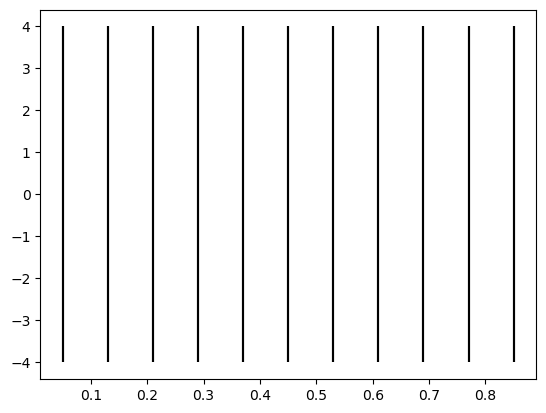

In [7]:
if 'repptis' in fol:
    plot_rv_repptis(pathensembles, interfaces, 3)
else:
    plot_rv_star(pathensembles, interfaces, 3)

# Analysis

In [32]:
# Setting path ensemble properties
#==================================
for i,fol in enumerate(folders):
    print(i)
    print("Calculating path lengths.")
    set_tau_distrib(pathensembles[i])
    print("Done.")

    if True:
        print("Calculating first hitting lengths to middle interface")
        set_tau_first_hit_M_distrib(pathensembles[i])
        print("Done.")

0
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
1
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
2
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
3
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
4
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.


In [8]:
# Analyze the pptis simulation.
# Analysis output is saved to the data dictionary.
data = {}
for i, pe in enumerate(pathensembles):
    print("doing pathensemble {}".format(i))
    if i == 0:
        data[i] = {}
        continue  # TODO: make [0-] analysis ???

    # masks - TODO not used further on?
    # TODO these functions are duplicate in repptis_analysis
    #masks = get_lmr_masks(pe)
    #loadmask = get_generation_mask(pe, "ld")
    #print("Amount of loads: {}".format(np.sum(loadmask)))
    ##hardloadmask = get_hard_load_mask(loadmask)
    #accmask = get_flag_mask(pe, "ACC")

    # pathtype_cycles
    pathtypes = ("LML", "LMR", "RML", "RMR")
    pathtype_cycles = {}
    for ptype in pathtypes:
        pathtype_cycles[ptype] = unwrap_by_weight(
                (pe.lmrs == ptype).astype(int), pe.weights)
    
    # running average analysis: ["running"]
    data[i] = {}
    data[i]["running"] = {}
    data[i]["running"]["plocal"] = {}
    # you'll still have to hardload select pe.weigths... TODO. # this is comment wouter?
    for (ptype, p_loc) in zip(pathtypes, 
                              running_avg_local_probs(pathtype_cycles, 
                                                      pe.weights, tr = False)):
        data[i]["running"]["plocal"][ptype] = p_loc

    # analysis using all data: ["full"]
    plocfull = get_local_probs(pe, tr=False)
    data[i]["full"] = {}
    for ptype in pathtypes:
        data[i]["full"][ptype] = plocfull[ptype]

    # data[i] have now ["full"] and ["running"]

doing pathensemble 0
doing pathensemble 1
Weights of the different paths:
wRMR = 0
wRML = 15039
wLMR = 14962
wLML = 0
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 1.0
pLML = 0.0
Local crossing probabilities:
p2R = 0.49871670944301855
p2L = 0.5012832905569814
doing pathensemble 2
Weights of the different paths:
wRMR = 0
wRML = 14983
wLMR = 15018
wLML = 0
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 1.0
pLML = 0.0
Local crossing probabilities:
p2R = 0.500583313889537
p2L = 0.49941668611046297
doing pathensemble 3
Weights of the different paths:
wRMR = 0
wRML = 14875
wLMR = 15126
wLML = 0
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 1.0
pLML = 0.0
Local crossing probabilities:
p2R = 0.5041831938935368
p2L = 0.4958168061064631
doing pathensemble 4
Weights of the different paths:
wRMR = 0
wRML = 14948
wLMR = 15052
wLML = 0
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 1.0
pLML = 0.0
Local crossing probabilities:
p2R = 0.5017333333333334

/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/tistools/lib/repptis_analysis.py:555: RuntimeWarning: invalid value encountered in divide
  p_PP = cumsums['RMR']/(cumsums['RML']+cumsums['RMR'])
/mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/APPTIS/tistools/lib/repptis_analysis.py:556: RuntimeWarning: invalid value encountered in divide
  p_PN = cumsums['RML']/(cumsums['RML']+cumsums['RMR'])


In [9]:

for i, pe in enumerate(pathensembles):
    upe = pe.unify_pe()
    # Pathlength distribution
    data[i]["pathlengths"] = pathlength_distr(upe)  # these might be used later or not! TODO
        
#=======================================
# make figures
makefigs = True 
if makefigs:
    for i, pe in enumerate(pathensembles):     
        if i == 0:
            continue
        # Cross distances distribution
        L, M, R, lmlpercs, lmllambs, rmrpercs, rmrlambs = cross_dist_distr(pe)
        fig,ax = plt.subplots()
        ax.plot(lmllambs, lmlpercs, lw=1, c="g")
        ax.plot(rmrlambs, rmrpercs, lw=1, c="r")
        for lamb in (L,M,R):
            ax.axvline(lamb, color='k', linestyle='--', lw = 0.5)
        ax.set_xlabel('Cross distance')
        ax.set_ylabel('Frequency')
        ax.set_title("Ensemble {}. L = {}, M = {}, R = {}".format(
            pe.name, L, M, R))
        ax.set_ylim(0)
        fig.savefig(f"pathensemble_{i}_crossdist.pdf")
        plt.close(fig)

        # Pathlength distribution      
        for ptype in pathtypes:
            fig, ax = plt.subplots()
            ax.plot(data[i]["pathlengths"][ptype]["bin_centers"], 
                data[i]["pathlengths"][ptype]["hist"])
            ax.set_xlabel('Pathlength')
            ax.set_ylabel('Frequency')
            ax.set_title(f"{np.sum(data[i]['pathlengths'][ptype]['hist'])} " + \
                         f"{ptype} paths. ")
            ax.legend([f"mean = {data[i]['pathlengths'][ptype]['mean']:.2f}, " + \
                          f"std = {data[i]['pathlengths'][ptype]['std']:.2f}"])
            fig.savefig(f"pathensemble_{i}_pathlength_{ptype}.pdf")
            plt.close(fig)

Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True


/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/elias/anaconda3/envs/test/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Pcross with recursive relations

In [10]:
# Global crossing probabilities
# WITHOUT ERRORS #  
# Full data 
psfull = []
for i in range(1, len(pathensembles)):   # do not use the 0- ensemble
    psfull.append({"LMR": data[i]["full"]["LMR"], 
               "RML": data[i]["full"]["RML"], 
               "RMR": data[i]["full"]["RMR"],
               "LML": data[i]["full"]["LML"]})

Pminfull, Pplusfull, Pcrossfull = get_globall_probs(psfull)

This should be the same as the repptis_report.pdf value: 1.0
which is the case!
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
Here, the load immediately disappeared. For a simulation where this is
not the case, the above code should be adapted a little bit.


/tmp/ipykernel_538392/76830505.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


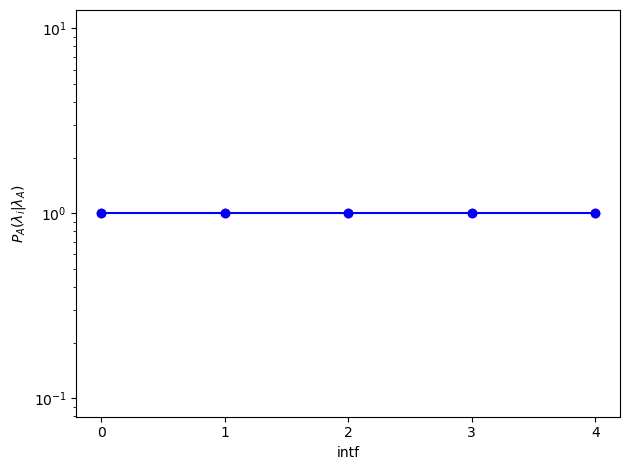

In [11]:
# Make a figure of the global crossing probabilities
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(Pcrossfull, "o", c = "r")
ax.errorbar([i for i in range(len(Pcrossfull))], Pcrossfull, fmt="-o", c = "b", ecolor="r", capsize=6)


# cosdip meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.004830, Pcrossfull[2]*0.05068988646, Pcrossfull[3]*0.05189862680, Pcrossfull[4]*0.05071184896, Pcrossfull[5]*0.05083284286, Pcrossfull[6]*0.05067963543], fmt="-o", c = "b", ecolor="r", capsize=6)

# cosbump meta
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002535, Pcrossfull[2]*0.04393065503, Pcrossfull[3]*0.04910273500, Pcrossfull[4]*0.05239942040, Pcrossfull[5]*0.05789033634, Pcrossfull[6]*0.0614468], fmt="-o", c = "b", ecolor="r", capsize=6)

# cosbump meta true
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002629, Pcrossfull[2]*0.03973528878, Pcrossfull[3]*0.03900922030, Pcrossfull[4]*0.05239942040, Pcrossfull[5]*0.03734118282, Pcrossfull[6]*0.03899369101], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosdips
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.007239, Pcrossfull[2]*0.0414296, Pcrossfull[3]*0.0445266, Pcrossfull[4]*0.0483538], fmt="-o", c = "b", ecolor="r", capsize=6)

# 3 cosbumps
# ax.errorbar([i for i in range(7)], Pcrossfull, yerr=[0, 0.002295, Pcrossfull[2]*0.0328798, Pcrossfull[3]*0.031594, Pcrossfull[4]*0.031474, Pcrossfull[5]*0.03080392, Pcrossfull[6]*0.0308589], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosbumps
#ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002768, Pcrossfull[2]*0.04440278, Pcrossfull[3]*0.043053, Pcrossfull[4]*0.0463156], fmt="-o", c = "b", ecolor="r", capsize=6)

# 2 cosbumps Langevin
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.006395, Pcrossfull[2]*0.02092401277, Pcrossfull[3]*0.01899419954, Pcrossfull[4]*0.01929952226], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat dt=0.00002 30k cycles
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.003294, Pcrossfull[2]*0.07640968, Pcrossfull[3]*0.07789262, Pcrossfull[4]*0.0812692], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat 100k cycles
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.002741, Pcrossfull[2]*0.034092, Pcrossfull[3]*0.033621, Pcrossfull[4]*0.0398], fmt="-o", c = "b", ecolor="r", capsize=6)

# flat Langevin
# ax.errorbar([i for i in range(5)], Pcrossfull, yerr=[0, 0.013684, Pcrossfull[2]*0.0825226801, Pcrossfull[3]*0.01027325454, Pcrossfull[4]*0.02130629112], fmt="-o", c = "b", ecolor="r", capsize=6)

ax.set_xlabel("intf")
ax.set_ylabel(r"$P_A(\lambda_i|\lambda_A)$")
ax.set_xticks(np.arange(len(interfaces)))
fig.tight_layout()
fig.show()
fig.savefig("Global_probs.pdf")

print("This should be the same as the repptis_report.pdf value:", Pcrossfull[-1])
print("which is the case!")
print(Pcrossfull)
print([Pcrossfull[i]/Pcrossfull[i-1] for i in range(1,len(Pcrossfull))])
print("Here, the load immediately disappeared. For a simulation where this is")
print("not the case, the above code should be adapted a little bit.")

In [12]:
# TODO I am not sure what this is

# Construct lists of the local probs

# Or we can use the get_global_probz function, using lists of the local probs
# These do not use the 0- ensemble
pmps = [data[i]["full"]["LMR"] for i in range(1,len(pathensembles))]
pmms = [data[i]["full"]["LML"] for i in range(1,len(pathensembles))]
ppps = [data[i]["full"]["RMR"] for i in range(1,len(pathensembles))]
ppms = [data[i]["full"]["RML"] for i in range(1,len(pathensembles))]
a,b,c = get_global_probz(pmps, pmms, ppps, ppms)
print("This should be the same as the repptis_report.pdf value:", c[-1])

This should be the same as the repptis_report.pdf value: 1.0


# Now work with MSM

In [13]:
from tistools import construct_M
from tistools import global_cross_prob
from tistools import mfpt_to_first_last_state

from tistools import create_labels_states

In [14]:
def print_vector(g, states=None):
    if states is None:
        for i in range(len(g)):
            print("state", i, g[i])
    else:
        for i in range(len(g)):
            print("state", states[i], g[i][0])

In [15]:
print(interfaces)
N = len(interfaces)
# assert N >= 4
NS = 4*N-5
print("N", N)
print("len pmms", len(pmms))
print("NS", NS)

#labels2 = ["0+- LML","0+- LMR","0+- RML","1+- LML","1+- LMR",
#           "1+- RML", "1+- RMR", "2+- LML", "2+- LMR",
#           "2+- RML", "2+- RMR", "3+- LML", "3+- LMR",]
labels1, labels2 = create_labels_states(N)

[-0.1, 0.0, 0.1, 0.2, 0.3]
N 5
len pmms 4
NS 15


In [16]:
print("mm", pmms)
print("mp", pmps)
print("pm", ppms)
print("pp", ppps)
print("sum", np.array(pmms)+np.array(pmps))
print("sum", np.array(ppms)+np.array(ppps))
M = construct_M(pmms, pmps, ppms, ppps, N)

#Local crossing probabilities:
#pRMR = 0.34205627942625644.  #ppps
#pRML = 0.6579437205737436.   #ppms
#pLMR = 0.25316455696202533.  #pmps
#pLML = 0.7468354430379747.   #pmms

mm [0.0, 0.0, 0.0, 0.0]
mp [1.0, 1.0, 1.0, 1.0]
pm [1.0, 1.0, 1.0, 1.0]
pp [0.0, 0.0, 0.0, 0.0]
sum [1. 1. 1. 1.]
sum [1. 1. 1. 1.]


In [17]:
print("M")
print("shape", M.shape)
print("sum prob in rows", np.sum(M,axis=1))
print(M)
# row 8, 10, 12, 14. # counting starts from 0   not okay!!!!

M
shape (15, 15)
sum prob in rows [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Look at this Markov model

In [18]:
#import numpy.linalg
vals, vecs = np.linalg.eig(M)
print(vals)
vals, vecs = np.linalg.eig(M.T)
print(vals)
pprint(M)

[ 0. +0.j         0. +0.j         0. +0.j         0. +0.j
  0. +0.j         0. +0.j         0. +0.j         0. +0.j
  0. +0.j        -1. +0.j        -0.5+0.8660254j -0.5-0.8660254j
  0.5+0.8660254j  0.5-0.8660254j  1. +0.j       ]
[-1. +0.j        -0.5+0.8660254j -0.5-0.8660254j  0.5+0.8660254j
  0.5-0.8660254j  1. +0.j         0. +0.j         0. +0.j
  0. +0.j         0. +0.j         0. +0.j         0. +0.j
  0. +0.j         0. +0.j         0. +0.j       ]
array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,

In [19]:
print("what if chain propagates")
print("A[0,:]")
# check stationary behavior
A = M
for n in range(10):
    A = np.dot(A,M)
    #print(A)
    print(A[0,:])
    print(np.sum(A[0,:]))  # is 1 indeed

what if chain propagates
A[0,:]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1.0


# Pcross with MSM

In [20]:
# global crossing prob
z1, z2, y1, y2 = global_cross_prob(M)
print("Z")
print_vector(z1, labels1)
print_vector(z2, labels2)
print("Y")
print_vector(y1, labels1)
print_vector(y2, labels2)
print("global crossing prob", y1[0])

Z
state 0-      0
state B       1
state 0+- LML 0.0
state 0+- LMR 1.0
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 1.0
state 1+- RML 0.0
state 1+- RMR 1.0
state 2+- LML 0.0
state 2+- LMR 1.0
state 2+- RML 0.0
state 2+- RMR 1.0
state 3+- LML 0.0
state 3+- LMR 1.0
Y
state 0-      1.0
state B       0.0
state 0+- LML 0.0
state 0+- LMR 1.0
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 1.0
state 1+- RML 0.0
state 1+- RMR 1.0
state 2+- LML 0.0
state 2+- LMR 1.0
state 2+- RML 0.0
state 2+- RMR 1.0
state 3+- LML 0.0
state 3+- LMR 1.0
global crossing prob [1.]


# Collecting times

In [21]:
def print_all_tau(pathensembles, taumm, taump, taupm, taupp):
    # print all tau
    print(f"                  mm            mp            pm            pp")
    for i in range(len(pathensembles)):
        print(f"{i} {pathensembles[i].name}  {taumm[i]:13.1f} {taump[i]:13.1f} {taupm[i]:13.1f} {taupp[i]:13.1f}")

In [24]:
tau_mm, tau_mp, tau_pm, tau_pp = collect_tau(pathensembles)
tau1_mm, tau1_mp, tau1_pm, tau1_pp = collect_tau1(pathensembles)
tau2_mm, tau2_mp, tau2_pm, tau2_pp = collect_tau2(pathensembles)
taum_mm, taum_mp, taum_pm, taum_pp = collect_taum(pathensembles)

Collect tau
ensemble 0 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000
ensemble 1 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/001
ensemble 2 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/002
ensemble 3 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/003
ensemble 4 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/004
Collect tau1
Collect tau2
Collect taum


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [23]:
print("tau")
print_all_tau(pathensembles, tau_mm, tau_mp, tau_pm, tau_pp)
print("\ntau1")
print_all_tau(pathensembles, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
print("\ntaum")
print_all_tau(pathensembles, taum_mm, taum_mp, taum_pm, taum_pp)
print("\ntau2")
print_all_tau(pathensembles, tau2_mm, tau2_mp, tau2_pm, tau2_pp)

tau
                  mm            mp            pm            pp
0 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000            0.0           0.0           0.0        2837.4
1 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/001            0.0         618.9         621.5           0.0
2 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/002            0.0        1246.4        1264.3           0.0
3 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/003            0.0        1239.7        1269.8           0.0
4 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/004            0.0        1266.9        1274.2           0.0

tau1
                  mm            mp            pm            pp
0 /mnt/0bf0c339-34bb-4500-a5fb-f3c2a863de29/DATA/MSM-REPPTIS/1D-experiments/REPPTIS/000            nan           nan           nan         

NameError: name 'taum_mm' is not defined

In [45]:
def construct_tau_vector(N, NS, taumm, taump, taupm, taupp):
    assert N>=3
    assert NS==4*N-5
    assert len(taumm) == N
    assert len(taump) == N
    assert len(taupm) == N
    assert len(taupp) == N
    # unravel the values into one vector
    tau = np.zeros(NS)
    # [0-]
    tau[0] = taupp[0]
    # [0+-]
    tau[1] = taumm[1]
    tau[2] = taump[1]
    tau[3] = taupm[1]
    # [1+-] etc
    for i in range(1,N-2):
        tau[4*i]   = taumm[i+1]
        tau[4*i+1] = taump[i+1]
        tau[4*i+2] = taupm[i+1]
        tau[4*i+3] = taupp[i+1]
    # [(N-2)^(-1)]
    tau[-3] = taumm[-1]
    tau[-2] = taump[-1]
    # B
    tau[-1] = 0.   # whatever
    return tau

In [46]:
tau  = construct_tau_vector(N, NS, tau_mm, tau_mp, tau_pm, tau_pp)
tau1 = construct_tau_vector(N, NS, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
taum = construct_tau_vector(N, NS, taum_mm, taum_mp, taum_pm, taum_pp)
tau2 = construct_tau_vector(N, NS, tau2_mm, tau2_mp, tau2_pm, tau2_pp)
tau_m = tau-tau1-tau2  # yes, this is the same thing as taum

print("tau")
print(tau)
print("\n")
print("tau1")
print(tau1)
print("taum")
print(taum)
print("tau2")
print(tau2)

print("\n")
print("tau = tau1+taum+tau2 => difference is", np.sum((tau-tau1-taum-tau2)**2))

tau
[2837.39300713           nan  618.92053733  621.52609881           nan
 1246.39410081 1264.25568978           nan           nan 1239.68433926
 1269.77478992           nan           nan 1266.91636219    0.        ]


tau1
[  0.                  nan   0.         621.51971541          nan
 623.18543179 632.12934659          nan          nan 619.83235275
 634.88517647          nan          nan 633.46535574   0.        ]
taum
[2.83739301e+03 0.00000000e+00 5.94800508e-03 6.38340315e-03
 0.00000000e+00 5.92582729e-03 5.07241540e-03 0.00000000e+00
 0.00000000e+00 7.00733787e-03 6.18487395e-03 0.00000000e+00
 0.00000000e+00 6.17817046e-03 0.00000000e+00]
tau2
[  0.                  nan 618.91458932   0.                  nan
 623.20274319 632.12127077          nan          nan 619.84497918
 634.88342857          nan          nan 633.44482827   0.        ]


tau = tau1+taum+tau2 => difference is nan


# Compute tau for [0+]

In [ ]:
g1, g2, h1, h2 = mfpt_to_first_last_state(M, tau1.nan_to_num, tau_m.nan_to_num, tau2.nan_to_num) #, doprint=True)
print("G")
print_vector(g1, labels1)
print_vector(g2, labels2)
print("H")
print_vector(h1, labels1)
print_vector(h2, labels2)
print("interesting")
print(h1[0])

G
state 0-      0.0
state B       0.0
state 0+- LML nan
state 0+- LMR nan
state 0+- RML nan
state 1+- LML nan
state 1+- LMR nan
state 1+- RML nan
state 1+- RMR nan
state 2+- LML nan
state 2+- LMR nan
state 2+- RML nan
state 2+- RMR nan
state 3+- LML nan
state 3+- LMR nan
H
state 0-      nan
state B       nan
state 0+- LML nan
state 0+- LMR nan
state 0+- RML nan
state 1+- LML nan
state 1+- LMR nan
state 1+- RML nan
state 1+- RMR nan
state 2+- LML nan
state 2+- LMR nan
state 2+- RML nan
state 2+- RMR nan
state 3+- LML nan
state 3+- LMR nan
interesting
[nan]


In [48]:
print(h1[0][0])

nan


# Flux

In [62]:
flux = 1/(tau[0]+h1[0][0])
dt = 0.0002
flux
print(flux/dt, "1/time")

13.552717281537626 1/time
